# 7.4 DenseNet on CIFAR-10H

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Dataset import Dataset
from utils import get_splits

# Calibration analysis

In [2]:
df = pd.read_csv('data/cifar_out.csv', header=0, index_col=0)
var='Median Reaction Time (s)'
df[var] = df['median_rt']
df = Dataset(df, k=10, cal_size=2000)

## Uncalibrated

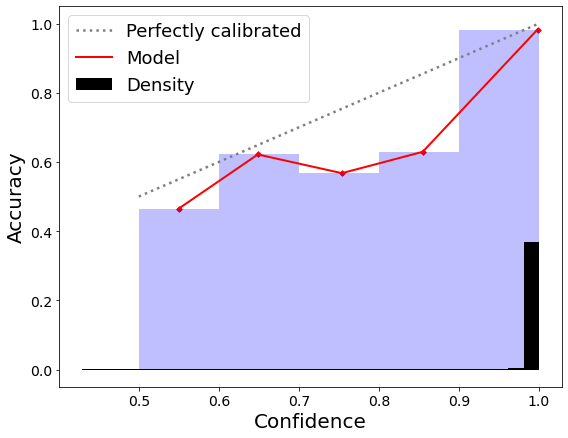

In [3]:
df.reliability_diagram(hist_weight=0.00005, filename="figs/cifar_uncal_reliability.png")

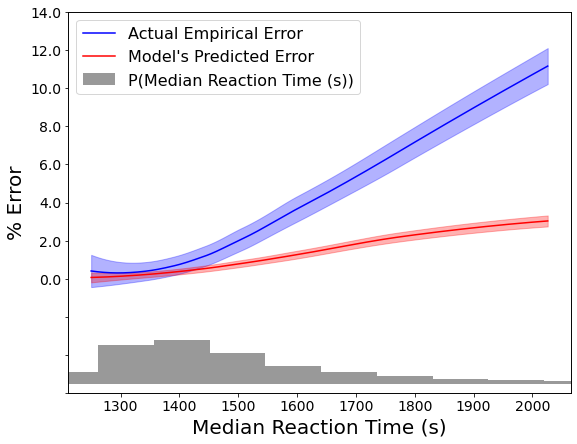

In [4]:
y_lim = df.gen_plot_lowess(var=var,s=0.9, hist=True, d=-0.0005, filename="figs/cifar_uncal_errdiff.png")

## Dirichlet-calibrated

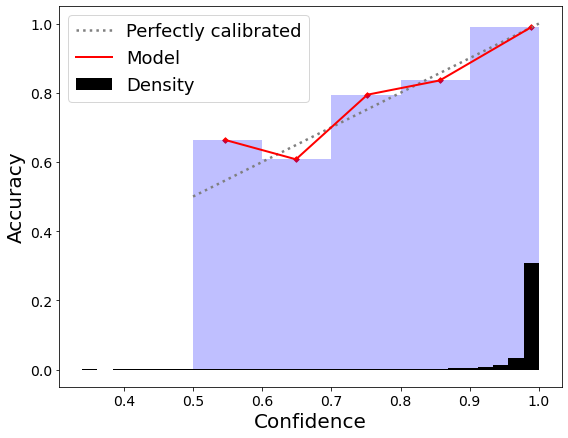

In [6]:
df.reliability_diagram(label="_dirichlet", hist_weight=0.00005, filename="figs/cifar_dirichlet_reliability.png")

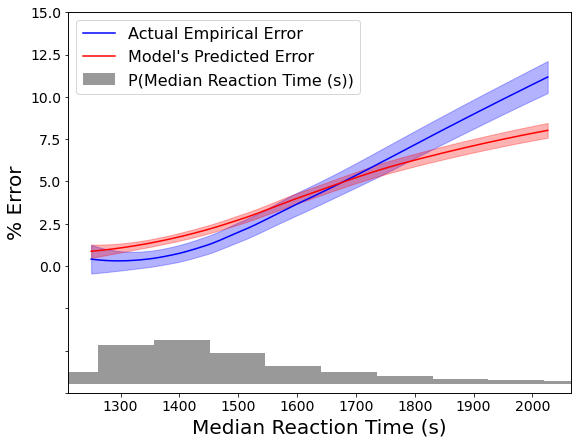

In [7]:
df.gen_plot_lowess(var=var, label="_dirichlet",  hist=True, 
                   use_lim=True, ylim=y_lim, s=0.9, d=-0.0005,filename="figs/cifar_dirichlet_errdiff.png")

## Variable-wise calibrated

In [8]:
split = get_splits(df.df_cal[[var]], df.df[[var]], df.df_cal['actual'], df.df['actual'],
           max_depth=3, min_samples_leaf=int(len(df.df_cal)/10))

In [9]:
df.split_calibrate(var,split, how='dirichlet')

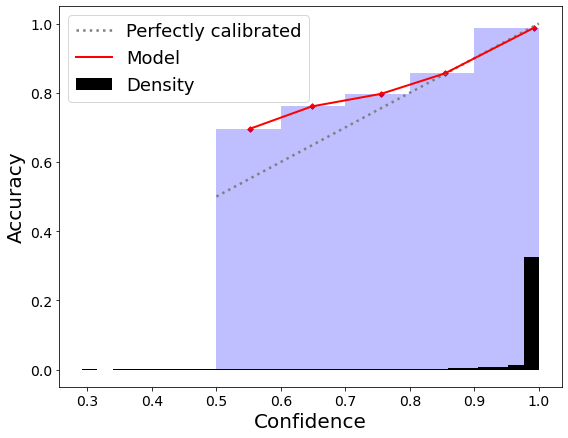

In [10]:
df.reliability_diagram(label="_split", hist_weight=0.00005, filename="figs/cifar_split_reliability.png")

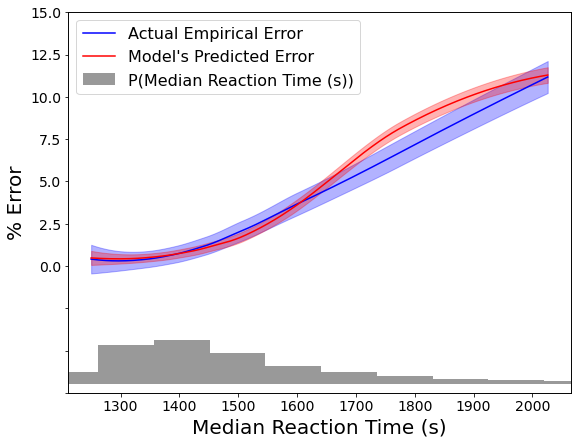

In [11]:
df.gen_plot_lowess(var=var, label='_split', hist=True, 
                   use_lim=True, ylim=y_lim,s=0.9,d=-0.0005, filename="figs/cifar_split_errdiff.png")

## Overall results

In [12]:
bins=10

In [13]:
print("uncalibrated ECE=",df.compute_ECE(num_bins=bins))
print("Kumar calibrated ECE=",df.compute_ECE(label="_kumar", num_bins=bins))
print("Dirichlet calibrated ECE=", df.compute_ECE(label="_dirichlet", num_bins=bins))
print("Variable-wise calibrated ECE=",df.compute_ECE(label="_split", num_bins=bins))

uncalibrated ECE= 0.019001828564384413
Kumar calibrated ECE= 0.038268302141212435
Dirichlet calibrated ECE= 0.007885222738425842
Variable-wise calibrated ECE= 0.011791834392420495


In [14]:
print("uncalibrated VECE =",df.compute_VECE(var=var, num_bins=bins))
print("Kumar calibrated VECE =",df.compute_VECE(label="_kumar",var=var, num_bins=bins))
print("Dirichlet calibrated VECE =",df.compute_VECE(label="_dirichlet",var=var, num_bins=bins))
print("Variable-wise calibrated VECE =",df.compute_VECE(label="_split",var=var, num_bins=bins))

uncalibrated VECE = 0.019190431212893905
Kumar calibrated VECE = 0.03596244205491177
Dirichlet calibrated VECE = 0.01120529709014811
Variable-wise calibrated VECE = 0.008624956751015822
